<a href="https://colab.research.google.com/github/dhahbimohamed/Predict_Tunisian_House_Rent/blob/main/Predict_Tunisian_House_Rent_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd


df = pd.read_csv("tayara.csv")




df = df.dropna(subset=['price'])


df = df[df['transaction'] == 'rent'].copy()


def clean_numeric(col):
    return pd.to_numeric(df[col].str.extract(r'(\d+)')[0], errors='coerce')

df['surface'] = clean_numeric('surface')
df['bathrooms'] = clean_numeric('bathrooms')
df['rooms'] = clean_numeric('rooms')


print("Unique room values:", df['rooms'].unique())
print("Unique bathroom values:", df['bathrooms'].unique())
print("Unique surface values:", df['surface'].unique())

print("Remaining rows:", df.shape[0])

Unique room values: [   3    5    4    2    8    9    1    7    6  200   10   15    0   11
   19   18   14   12   23   80   55   16   62   25   40   13   22   17
   45   35 1350]
Unique bathroom values: [   2    3    1    0    6    4   10    5 1150   80    9   14    8   21
   12   18   23   16   35   19   24   30  100   11   13   36   15   74
   20   60    7  111]
Unique surface values: [  3000    260    350    290     60    120    140    145     75    125
     80     90     83    154    150    110     82    250    200    600
     50    100     40    130    360    170    500    180   1000     12
     65  20000    105    450      1    585    230     68     77   2600
     70    392    160    122     33    159     55    101    129      0
     87     95    131     88    167    400     52    300     30    123
    107    111    148    108     78    113    136    112    102     16
     74      2     25    149     85    172     45    142    220    285
     31    189     35    119    116    114

In [ ]:
df.head()

,price,transaction,title,city,region,description,surface,bathrooms,rooms
10,200.0,rent,des appartements de vacances a hammamet,Nabeul,Hammamet,"Des appartements s0,s+1,s+2 a louer situés en ...",60,1,2
11,100.0,rent,appartement à louer s+3 à gremda,Sfax,Route_GREMDA,شقة مؤثثةممتازة الطابق الأول فيها ٣ غرف مع مكي...,120,2,3
23,350.0,rent,Villa Zembretta : Esprit Nautique pour vos Vac...,Nabeul,El_Haouaria,Villa Zembretta Téléphone : Afficher le numéro...,120,1,2
27,930.0,rent,location appartement semi meublé L'Aouina,Tunis,L_Aouina,on vous propose en location un appartement sem...,90,1,3
34,720.0,rent,Etage de villa à la location ENKHILETTE,Ariana,Borj_Louzir,Beau site vous propose à la location un un eta...,150,2,2


In [32]:
df = df[
    (df['rooms'] <= 4) & (df['rooms'] >= 0) &
    (df['bathrooms'] <= 2) & (df['bathrooms'] >= 0) &
    (df['surface'] >= 50) & (df['surface'] <= 300) &
    (df['price'] >= 50) & (df['price'] <= 1000)
]

print("Remaining rows after filtering:", df.shape[0])


Remaining rows after filtering: 1956


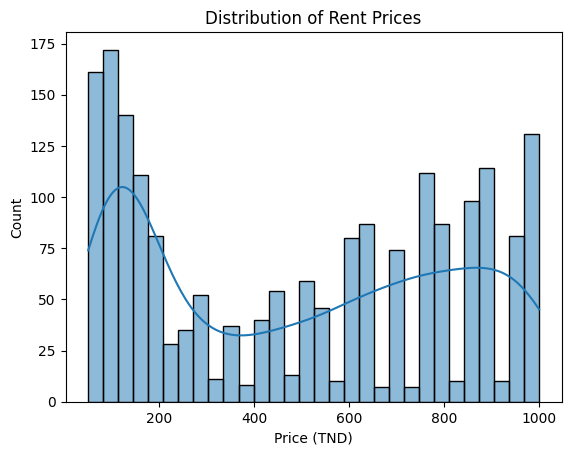

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Rent Prices")
plt.xlabel("Price (TND)")
plt.ylabel("Count")
plt.show()


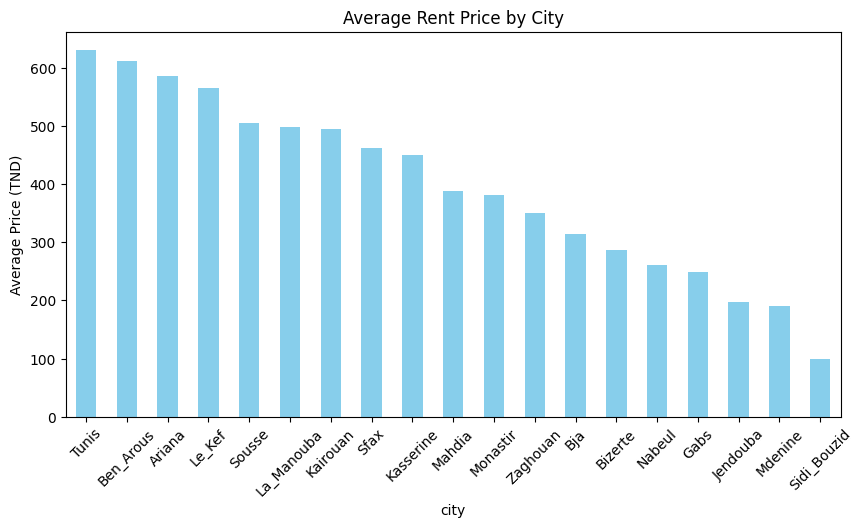

In [34]:
city_avg = df.groupby('city')['price'].mean().sort_values(ascending=False)

city_avg.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Average Rent Price by City")
plt.ylabel("Average Price (TND)")
plt.xticks(rotation=45)
plt.show()


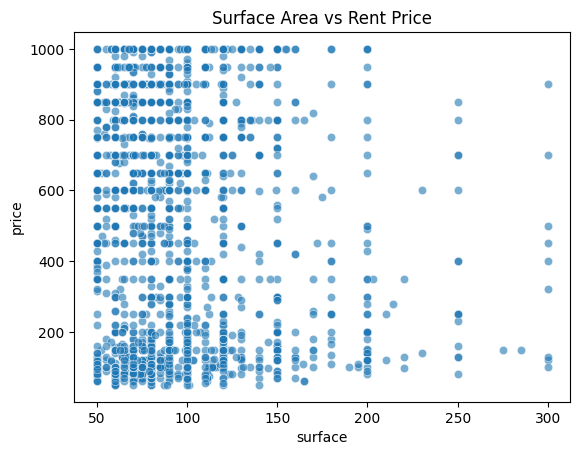

In [35]:
sns.scatterplot(data=df, x='surface', y='price', alpha=0.6)
plt.title("Surface Area vs Rent Price")
plt.show()

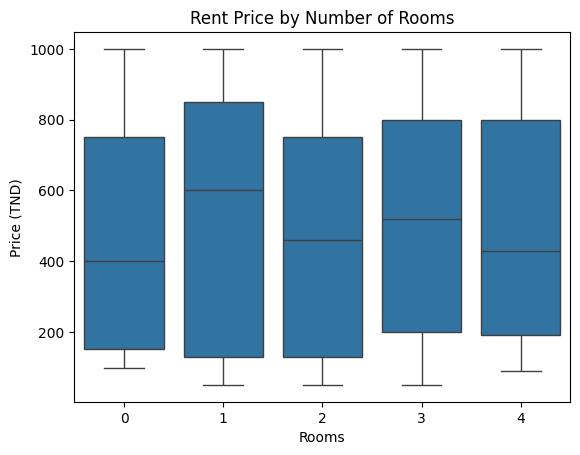

In [36]:
sns.boxplot(data=df, x='rooms', y='price')
plt.title("Rent Price by Number of Rooms")
plt.xlabel("Rooms")
plt.ylabel("Price (TND)")
plt.show()


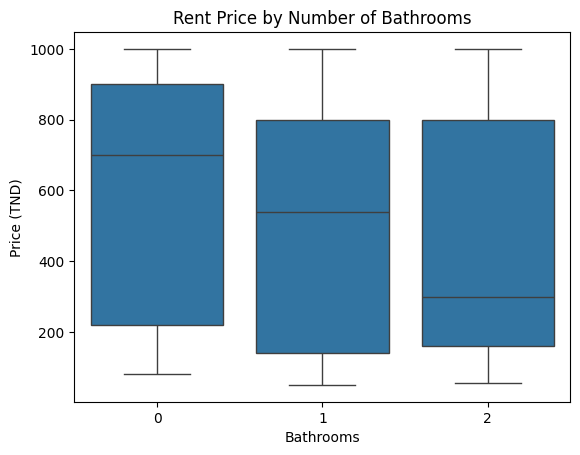

In [37]:
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title("Rent Price by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price (TND)")
plt.show()


In [38]:
df = df[
    (df['rooms'] >= 1) & (df['rooms'] <= 4) &
    (df['bathrooms'] >= 1) & (df['bathrooms'] <= 2)
]

print("New shape:", df.shape)


New shape: (1866, 9)


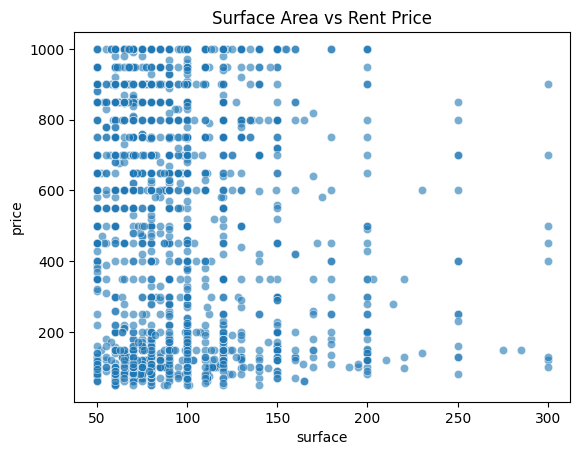

In [39]:
sns.scatterplot(data=df, x='surface', y='price', alpha=0.6)
plt.title("Surface Area vs Rent Price")
plt.show()

In [40]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'surface')


In [41]:
df_encoded = pd.get_dummies(df, columns=['city'] , prefix='city')
features = pd.concat([df[['surface','rooms','bathrooms']], df_encoded.drop(columns=['price', 'transaction', 'title', 'region', 'description'])] , axis=1)
target = df['price']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mea = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mea)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 242.68347513744962
Root Mean Squared Error: 289.69320659997555


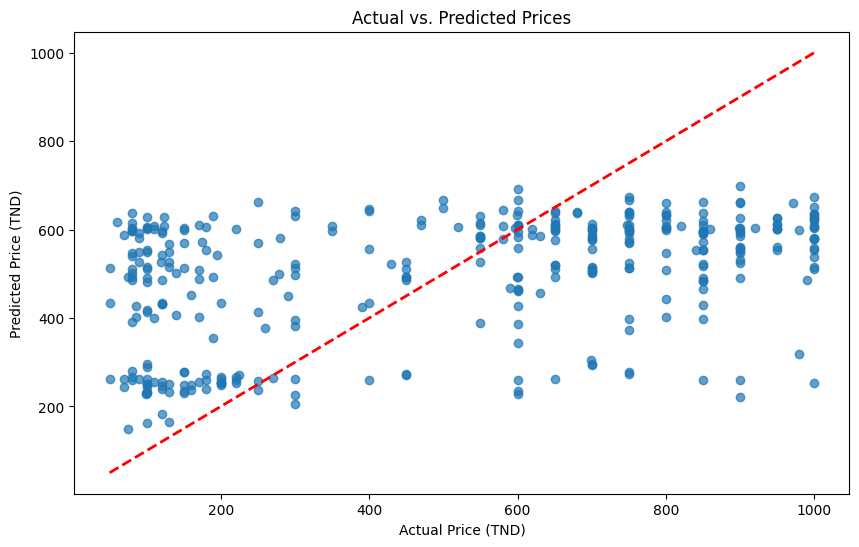

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price (TND)')
plt.ylabel('Predicted Price (TND)')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")


Random Forest MAE: 244.03
Random Forest RMSE: 306.85


In [45]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=1
)


grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_


y_pred_best = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("Best hyperparameters:", grid_search.best_params_)
print(f"Tuned RF MAE: {mae_best:.2f}")
print(f"Tuned RF RMSE: {rmse_best:.2f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned RF MAE: 244.12
Tuned RF RMSE: 302.30


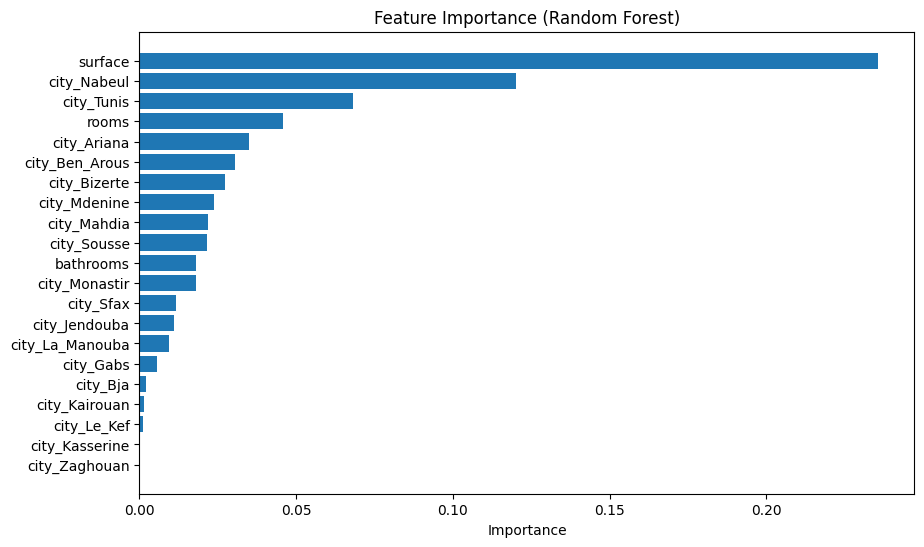

In [46]:
import matplotlib.pyplot as plt
import pandas as pd


importances = best_rf.feature_importances_
feature_names = features.columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()
